# Classifying Titanic Test Data


Importing necessary modules

In [72]:
import pandas as pd

from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

import numpy as np

import matplotlib as plt

import seaborn as sns

import matplotlib.pyplot as plt  

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from yellowbrick.classifier import ClassPredictionError, ClassificationReport, ROCAUC, PrecisionRecallCurve, ConfusionMatrix

# Data Analysis 

Reading training data and printing out the first 10 rows

In [73]:
titanic_data = pd.read_csv('train.csv')

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#getting the total rows and columns 
titanic_data.shape

(891, 12)

We can see that the dataset contains 891 rows and 12 columns

In [7]:
#counting the number of people who survived
ax= titanic_data['Survived']
ax.value_counts()

0    549
1    342
Name: Survived, dtype: int64

We can see that 549 people have not survived and 342 have survived in our training data

Visualizing data to better understand the features

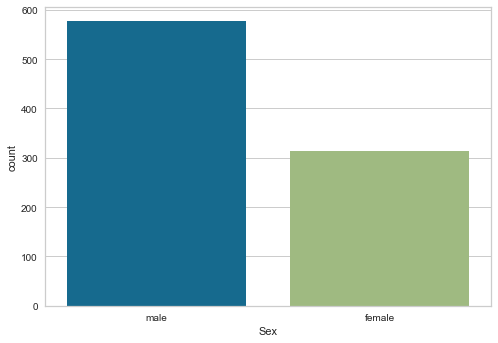

In [8]:
#Visualize the count of Males and Females
sns.countplot(titanic_data['Sex'])


It is observed that the total no: males is greater than the total no: of females

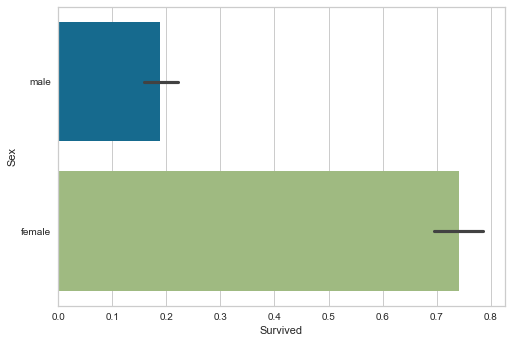

In [10]:
#Plotting "Sex" against "Survived"
sns.barplot(x='Survived',y='Sex', data=titanic_data)

It is observed that the survival rate of females is more than that of males. This information can be used to provide more importance to females while building a classifer.

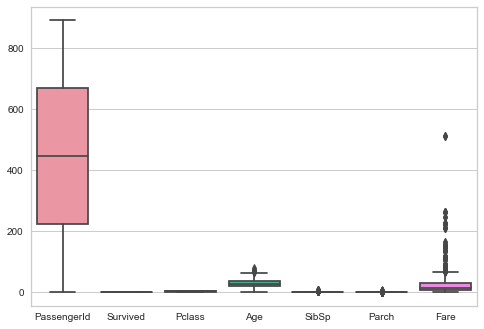

In [14]:
#Visualizing all the features in a boxplot
sns.boxplot(data=titanic_data, orient='v')

It is observed that there are outliers in age and fare column

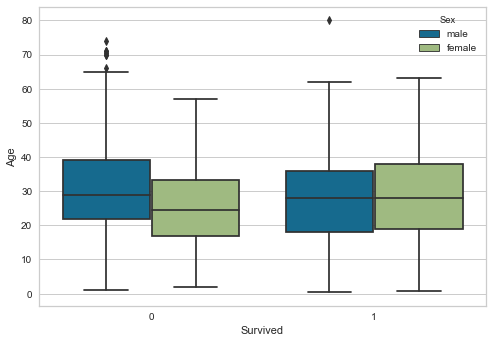

In [16]:
#categorize the Survivability based on Age and Sex
sns.boxplot(x='Survived',y='Age', hue='Sex', data=titanic_data)

It is observed that "age" is not as significant as "sex" with respect to "Survived". However it can be observed that among males - There is a larger number of survivers in the age group 20 - 30 compared to the age group 30 - 40. In the case of females it's the opposite.

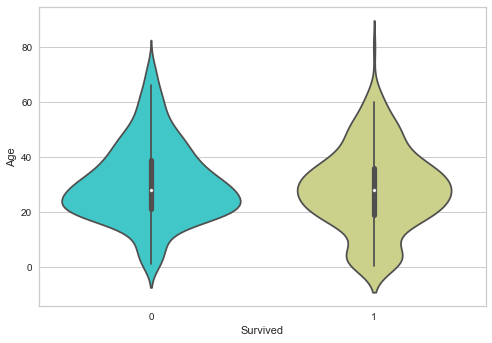

In [17]:
#Getting the kernel distribution and boxplot distribution of age and survivability
sns.violinplot(x="Survived", y="Age", data=titanic_data, palette='rainbow')

The above observations regarding age are a lot more clearly seen in the violin plot. 

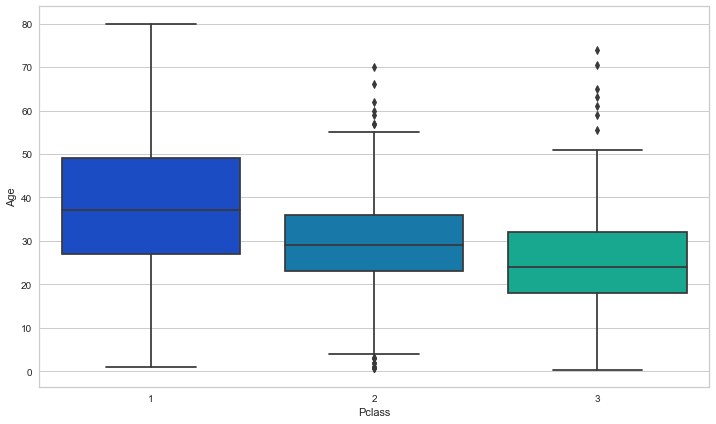

In [31]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=titanic_data,palette='winter')

It can be observed that passenger class1 has the highest number of passengers

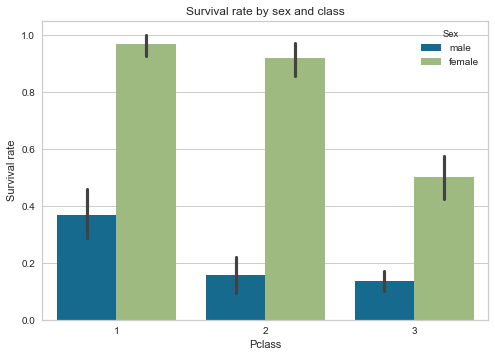

In [24]:
#plotting survival rate by sex and class
plt.title('Survival rate by sex and class')
g = sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_data).set_ylabel('Survival rate')

It can be observed that the number of males and females survived in the first passenger class is the highest

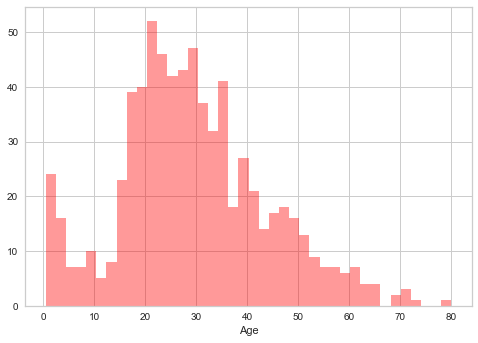

In [25]:
#Age distribution 
sns.distplot(titanic_data['Age'].dropna(),kde=False,color='red', bins=40)

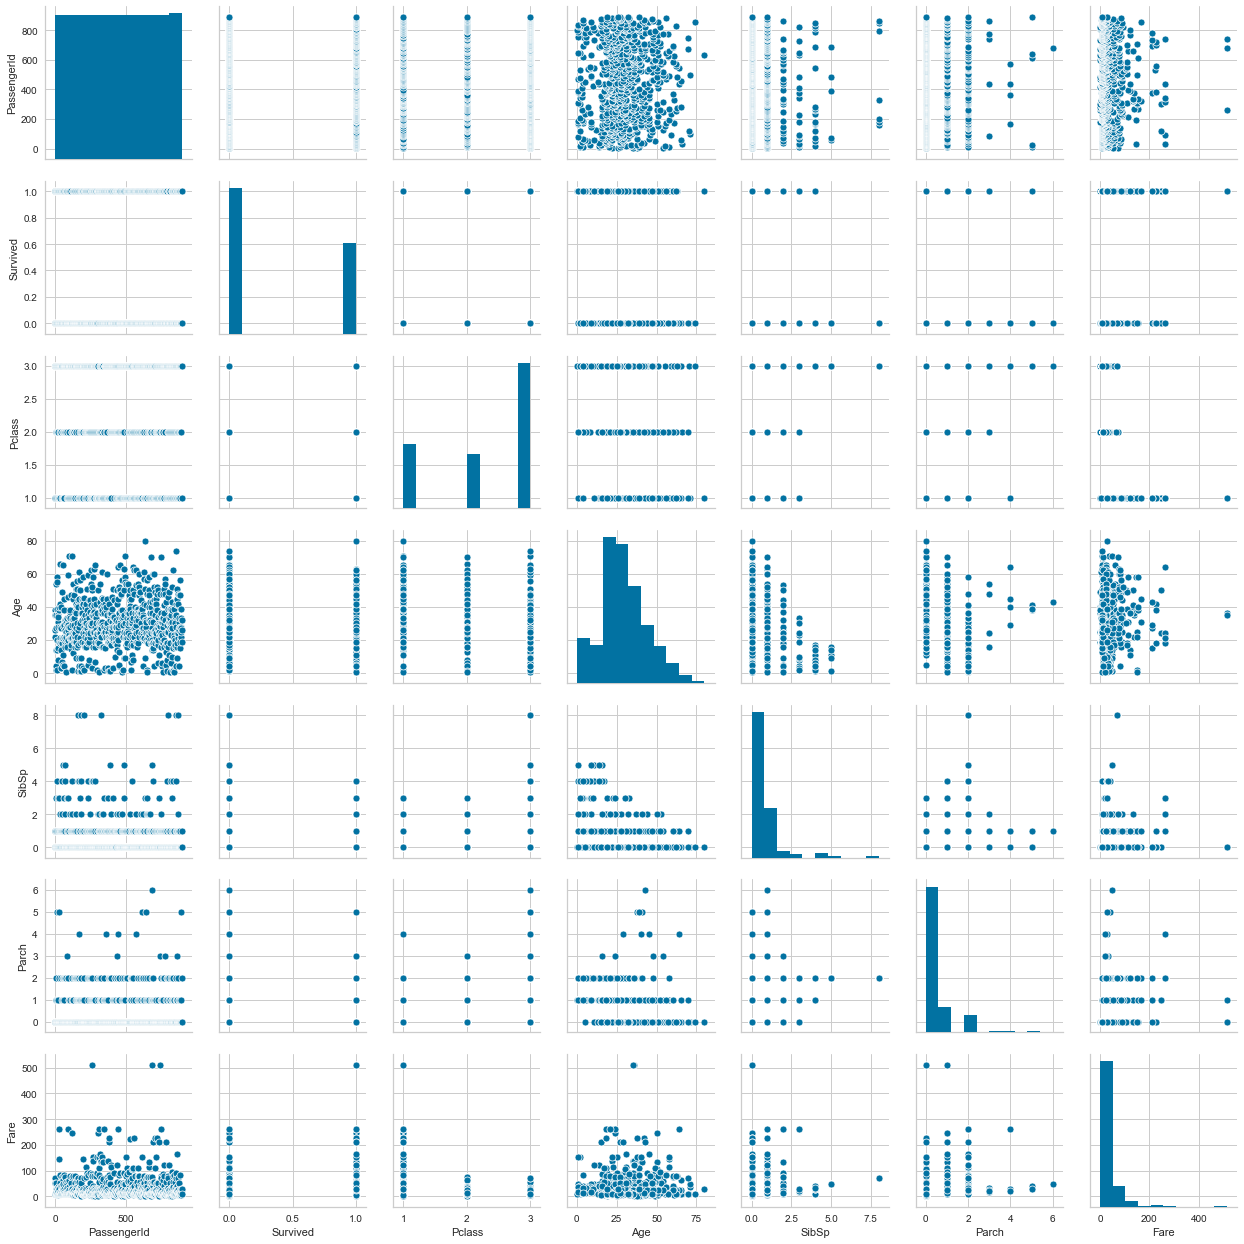

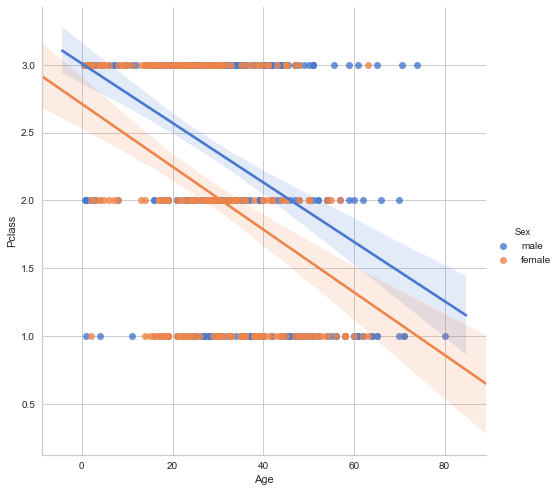

In [27]:
#visualizeing skewness
sns.pairplot(titanic_data)

#Lets look at Males vs Females on age vs Pclass:

sns.lmplot(x="Age", y="Pclass", hue="Sex", data=titanic_data, palette = 'muted', height = 7)
plt.show(sns)

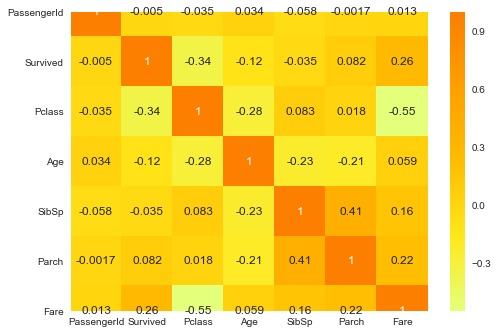

In [68]:
#finding the correlation between all the columns
corr = titanic_data.corr()

sns.heatmap(corr, cmap = 'Wistia', annot= True)
plt.show(sns)

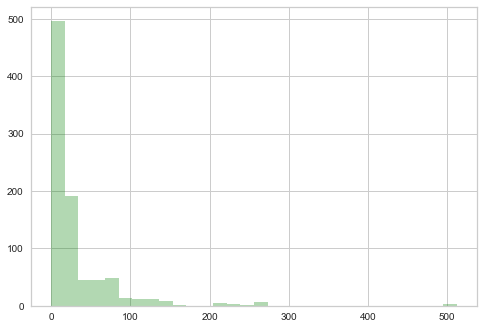

In [70]:
#visualizing the fare column
titanic_data['Fare'].hist(bins=30,color='green', alpha=0.3)

# Data Preprocessing

In [19]:
#checking for missing values in the data
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


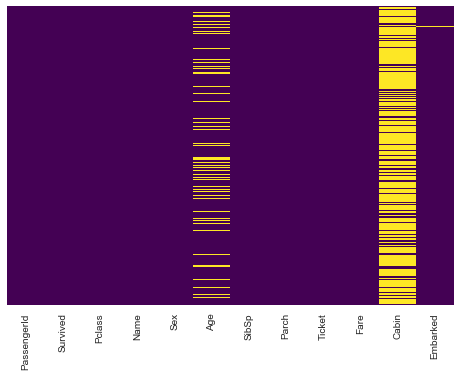

In [20]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

It an be observed from the heatmap that the features 'Age' and 'Cabin' have large number of missing data and hence we replace the age column by the mean value of males and females.

In [74]:
#separate male and female information
male = titanic_data.loc[titanic_data['Sex']=='male']

female = titanic_data.loc[titanic_data['Sex']=='female']

In [75]:
#Calculate the average mean for male 
mmin = float(male.nsmallest(1,'Age')['Age'])

mmax = float(male.nlargest(1,'Age')['Age'])

mavg = (mmin + mmax)/2

#Calculate the average age for women
fmin = float(female.nsmallest(1,'Age')['Age'])

fmax = float(female.nlargest(1,'Age')['Age'])

favg = (fmin + fmax)/2

In [77]:
#Replacing NaN values in Age with the calculated average ages
titanic_data.loc[(titanic_data['Sex'] == 'male') & (titanic_data['Age'].isnull()), 'Age'] = mavg 

titanic_data.loc[(titanic_data['Sex'] == 'female') & (titanic_data['Age'].isnull()), 'Age'] = favg 

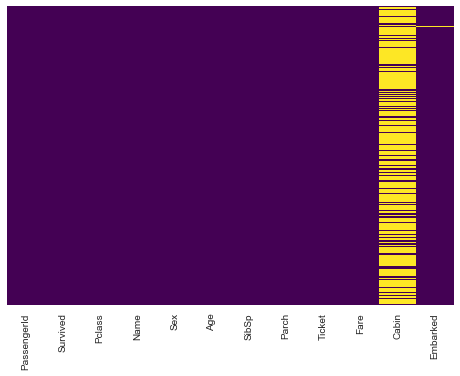

In [35]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We can observe that there are no missing values in the Age column

Saving and Dropping features with unique values

In [78]:

titanic_data = titanic_data.drop(['Cabin','Ticket'],axis=1)

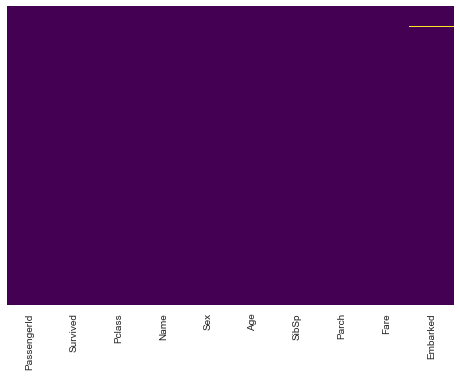

In [79]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

It is observed that there is missing values in the Embarked column

In [89]:
name1 = titanic_data['Name']
passengerid1 = titanic_data['PassengerId']
data = titanic_data
cols = ['Embarked']
data = titanic_data.drop(['Name'], axis=1)
id1 = data['PassengerId']
data = data.drop(['PassengerId'], axis=1)

### Transforming categorical features

Manually performed label encoding so as to provide importance to females due to the "Women and Children First" Protocol used

In [90]:
data.loc[(data['Sex'] == 'male'), 'Sex'] = 0 
data.loc[(data['Sex'] == 'female'), 'Sex'] = 1 

Separating features from target values and splitting the dataset into training and testing

In [92]:
ysplit = data['Survived']
xsplit = data.drop(['Survived'], axis=1)
xsplit = pd.get_dummies(xsplit, columns=cols)

xtrain, xtest = train_test_split(xsplit, test_size=0.2, shuffle=False)
ytrain, ytest = train_test_split(ysplit, test_size=0.2, shuffle=False)

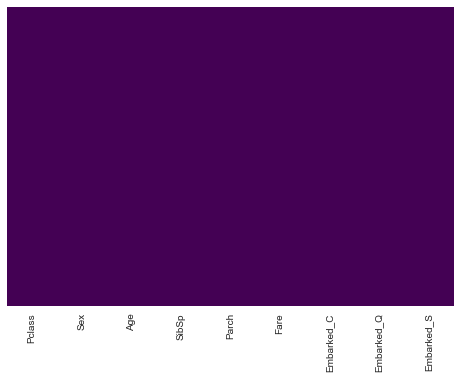

In [94]:
sns.heatmap(xsplit.isnull(),yticklabels=False,cbar=False,cmap='viridis')

It is observed that there are no missing values in the data

# Train and transform various classifiers using the split train and test data

In [97]:
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [98]:
clf = tree.DecisionTreeClassifier()
clf1 = GaussianNB()
clf2 = linear_model.LogisticRegression()
clf3 = svm.SVC(gamma=0.001, C=100.)
clf4 = RandomForestClassifier(max_depth=2, random_state=0)
sc = StandardScaler()

In [99]:
x_train = sc.fit_transform(xtrain)
x_test = sc.transform(xtest)

clf = clf.fit(xtrain,ytrain)
ypred = clf.predict(xtest)
acc = accuracy_score(ytest,ypred)

clf1 = clf1.fit(xtrain,ytrain)
ypred = clf1.predict(xtest)
acc1 = accuracy_score(ytest,ypred)

clf2 = clf2.fit(xtrain,ytrain)
ypred = clf2.predict(xtest)
acc2 = accuracy_score(ytest,ypred)

clf3 = clf3.fit(xtrain,ytrain)
ypred = clf3.predict(xtest)
acc3 = accuracy_score(ytest,ypred)

clf4 = clf4.fit(xtrain,ytrain)
ypred = clf4.predict(xtest)
acc4 = accuracy_score(ytest,ypred)

print("Using Decision Trees - " + "{:.2f}".format(acc) + "\n")
print("Using Gaussian Naive Bayes - " + "{:.2f}".format(acc1) + "\n")
print("Using Logistic Regression - " + "{:.2f}".format(acc2) + "\n")
print("Using Support Vector Machines - " + "{:.2f}".format(acc3) + "\n")
print("Using Random Forest - " + "{:.2f}".format(acc4) + "\n")

Using Decision Trees - 0.77

Using Gaussian Naive Bayes - 0.83

Using Logistic Regression - 0.84

Using Support Vector Machines - 0.84

Using Random Forest - 0.79



C:\Users\sanja\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sanja\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Read in and preprocess the actual test data

In [100]:
t_data = pd.read_csv('test.csv')
l_t_data = pd.read_csv('gender_submission.csv')

t_data.drop(['Cabin','Ticket'],axis=1,inplace=True)

name2 = t_data['Name']
passenger2 = t_data['PassengerId']
t_data.drop(['Name'], axis=1,inplace=True)
t_data = t_data.drop(['PassengerId'], axis=1)

t_data.loc[(t_data['Sex'] == 'male') & (t_data['Age'].isnull()), 'Age'] = mavg 
t_data.loc[(t_data['Sex'] == 'female') & (t_data['Age'].isnull()), 'Age'] = favg 

#t_data['Sex'] = le.fit_transform(t_data['Sex'])
t_data.loc[(t_data['Sex'] == 'male'), 'Sex'] = 0 
t_data.loc[(t_data['Sex'] == 'female'), 'Sex'] = 1 

ysplit2 = l_t_data['Survived']
xsplit2 = t_data

xsplit2 = pd.get_dummies(xsplit2, columns=cols)
xsplit2['Fare'].fillna(xsplit2['Fare'].mean(), inplace=True)

### Perform classification for test data

In [101]:
ypred = clf.predict(xsplit2)
acc = accuracy_score(ysplit2,ypred)

ypred = clf1.predict(xsplit2)
acc1 = accuracy_score(ysplit2,ypred)

ypred = clf2.predict(xsplit2)
acc2 = accuracy_score(ysplit2,ypred)

ypred = clf3.predict(xsplit2)
acc3 = accuracy_score(ysplit2,ypred)

ypred = clf4.predict(xsplit2)
acc4 = accuracy_score(ysplit2,ypred)

data = {'Decision Trees': acc, 'Gaussian Naive Bayes': acc1, 'Logistic Regression': acc2, 'Support Vector Machines': acc3, 'Random Forest': acc4 }

print("Using Decision Trees - " + "{:.2f}".format(acc) + "\n")
print("Using Gaussian Naive Bayes - " + "{:.2f}".format(acc1) + "\n")
print("Using Logistic Regression - " + "{:.2f}".format(acc2) + "\n")
print("Using Support Vector Machines - " + "{:.2f}".format(acc3) + "\n")
print("Using Random Forest - " + "{:.2f}".format(acc4) + "\n")

labels = list(data.keys())
values = list(data.values())

large_l = max(data, key=data.get)

print("Largest: ")
print(large_l + " - " + "{:.2f}".format(data[large_l]))

Using Decision Trees - 0.79

Using Gaussian Naive Bayes - 0.89

Using Logistic Regression - 0.95

Using Support Vector Machines - 0.92

Using Random Forest - 0.89

Largest: 
Logistic Regression - 0.95


It is observed that the highest accuracy rate is for logistic regression


### Visualize classification results for logistic regression

In [102]:
#model = tree.DecisionTreeClassifier()
#model = GaussianNB()
model = linear_model.LogisticRegression()
#model = svm.SVC(gamma=0.001, C=100, probability=True)
#model = RandomForestClassifier(max_depth=2, random_state=0)

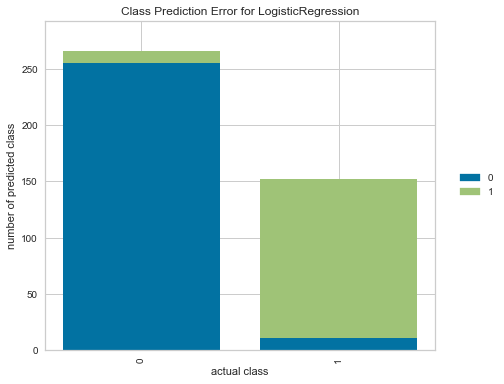

In [104]:
classes = ["0", "1"] 

viz = ClassPredictionError(model)
viz.fit(xtrain,ytrain)
viz.score(xsplit2,ysplit2)
viz.show()


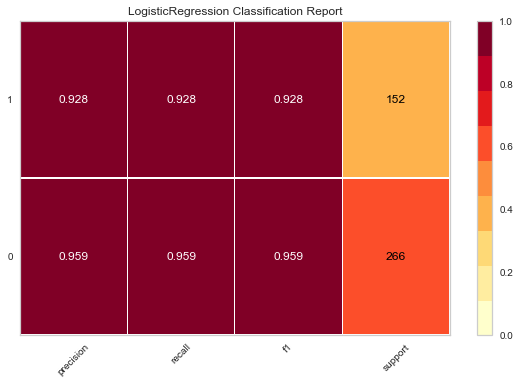

In [105]:
viz1 = ClassificationReport(model, classes=classes, support=True)
viz1.fit(xtrain,ytrain)
viz1.score(xsplit2,ysplit2)
viz1.show()

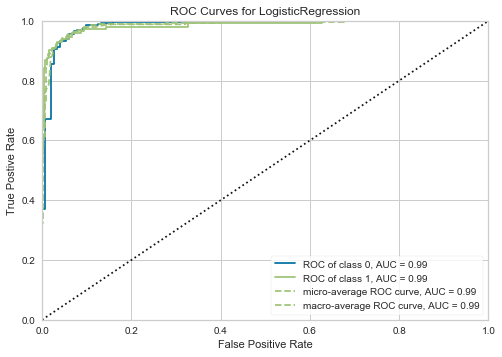

In [106]:
viz2 = ROCAUC(model, classes=classes)
viz2.fit(xtrain,ytrain)
viz2.score(xsplit2,ysplit2)
viz2.show()

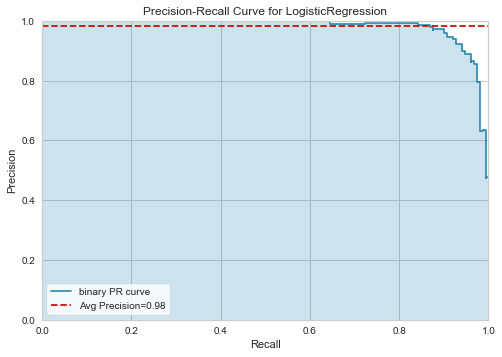

In [107]:
viz3 = PrecisionRecallCurve(model, micro=False, macro=False, per_class=True)
viz3.fit(xtrain,ytrain)
viz3.score(xsplit2,ysplit2)
viz3.show()

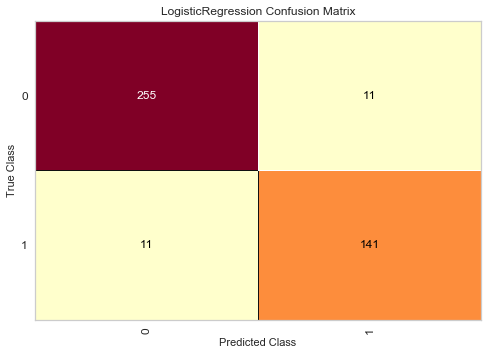

In [108]:
viz4 = ConfusionMatrix(model,classes=classes,label_encoder={ 0: '0', 1: '1' })
viz4.fit(xtrain,ytrain)
viz4.score(xsplit2,ysplit2)
viz4.show()

# Create csv to upload to kaggle

In [113]:
test=pd.read_csv('test.csv')


#Create a  DataFrame with the passengers ids and our prediction regarding whether they survived or not
submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':ypred})

#Visualize the first 5 rows
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [114]:
submission.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,0
9,901,0


In [115]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'Titanic Predictions_sa.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Titanic Predictions_sa.csv
